# Retrieval Strategies: Visual Guide to Similarity Metrics

This notebook explains different similarity metrics with **visual examples** to make them easy to understand!

We'll cover:
- Different ways to measure similarity (with pictures!)
- Various ranking strategies
- How to combine multiple approaches

## Setup

In [1]:
# Install required packages
# !pip install mistralai numpy scipy matplotlib seaborn

In [2]:
import os
from mistralai import Mistral
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

# Setup plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Setup Mistral client
api_key = os.getenv("MISTRAL_API_KEY")
client = Mistral(api_key=api_key)

print("✓ Setup complete!")

✓ Setup complete!


## Sample Data

Let's create our knowledge base for testing.

In [3]:
# Sample documents
documents = [
    "Python is a high-level programming language known for simplicity",
    "Machine learning algorithms learn patterns from data",
    "Deep learning uses neural networks with multiple layers",
    "Natural language processing helps computers understand text",
    "Python has powerful libraries for data science and ML",
    "Neural networks are inspired by the human brain",
    "Data science involves statistics and programming",
    "Artificial intelligence includes machine learning and deep learning"
]

# Get embeddings for all documents
print("Getting embeddings...")
response = client.embeddings.create(
    model="mistral-embed",
    inputs=documents
)

doc_embeddings = [np.array(item.embedding) for item in response.data]
print(f"✓ Created embeddings for {len(documents)} documents")
print(f"Each embedding has {len(doc_embeddings[0])} dimensions")

Getting embeddings...
✓ Created embeddings for 8 documents
Each embedding has 1024 dimensions


## Understanding Vectors in 2D

Before we dive into complex embeddings, let's visualize similarity in 2D space where we can actually see what's happening!

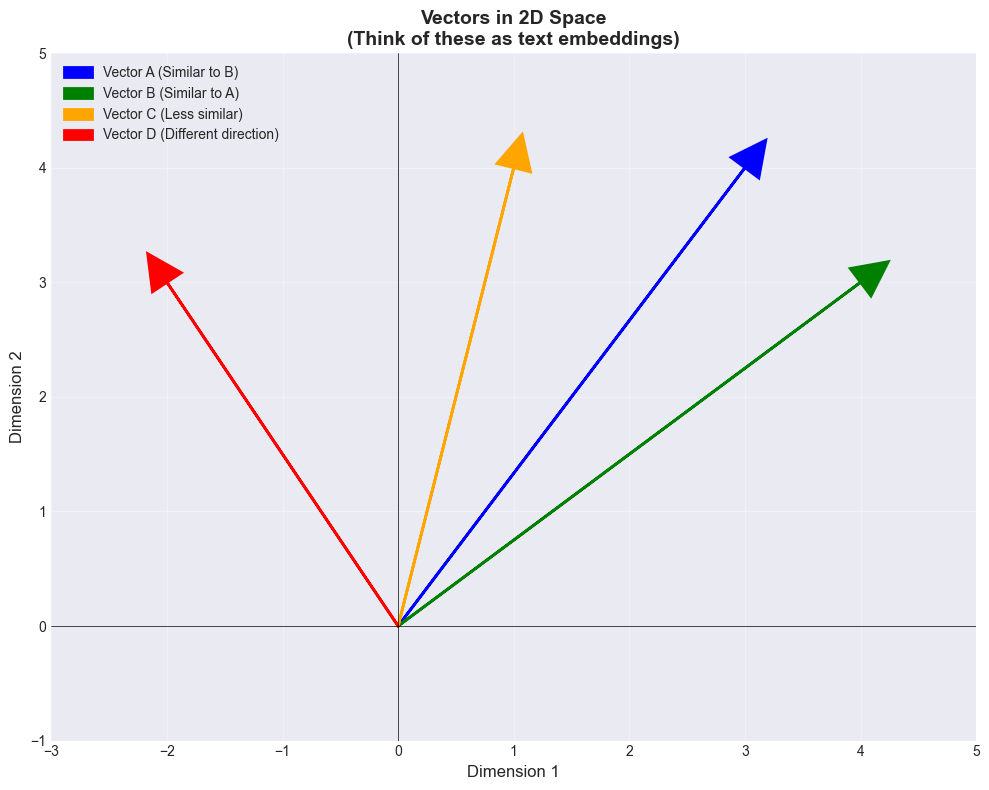

In this visualization:
  • Vectors that point in similar directions are semantically similar
  • The angle between vectors matters for cosine similarity
  • The distance between tips matters for Euclidean distance


In [4]:
# Create simple 2D vectors for visualization
vector_a = np.array([3, 4])
vector_b = np.array([4, 3])
vector_c = np.array([1, 4])
vector_d = np.array([-2, 3])

# Plot vectors
fig, ax = plt.subplots(figsize=(10, 8))

# Draw vectors as arrows from origin
ax.arrow(0, 0, vector_a[0], vector_a[1], head_width=0.3, head_length=0.3, 
         fc='blue', ec='blue', linewidth=2, label='Vector A (Similar to B)')
ax.arrow(0, 0, vector_b[0], vector_b[1], head_width=0.3, head_length=0.3, 
         fc='green', ec='green', linewidth=2, label='Vector B (Similar to A)')
ax.arrow(0, 0, vector_c[0], vector_c[1], head_width=0.3, head_length=0.3, 
         fc='orange', ec='orange', linewidth=2, label='Vector C (Less similar)')
ax.arrow(0, 0, vector_d[0], vector_d[1], head_width=0.3, head_length=0.3, 
         fc='red', ec='red', linewidth=2, label='Vector D (Different direction)')

ax.set_xlim(-3, 5)
ax.set_ylim(-1, 5)
ax.set_xlabel('Dimension 1', fontsize=12)
ax.set_ylabel('Dimension 2', fontsize=12)
ax.set_title('Vectors in 2D Space\n(Think of these as text embeddings)', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3)
ax.axhline(y=0, color='k', linewidth=0.5)
ax.axvline(x=0, color='k', linewidth=0.5)
ax.legend(loc='upper left')

plt.tight_layout()
plt.show()

print("In this visualization:")
print("  • Vectors that point in similar directions are semantically similar")
print("  • The angle between vectors matters for cosine similarity")
print("  • The distance between tips matters for Euclidean distance")

## Part 1: Similarity Metrics with Visual Explanations

Let's explore each metric with clear visuals!

### 1.1 Cosine Similarity 📐

**What it measures:** The angle between two vectors

**Key insight:** Ignores magnitude (length), only cares about direction

**Range:** -1 to 1 (for embeddings usually 0 to 1)
- 1.0 = Same direction (very similar)
- 0.0 = Perpendicular (unrelated)
- -1.0 = Opposite direction (opposite meaning)

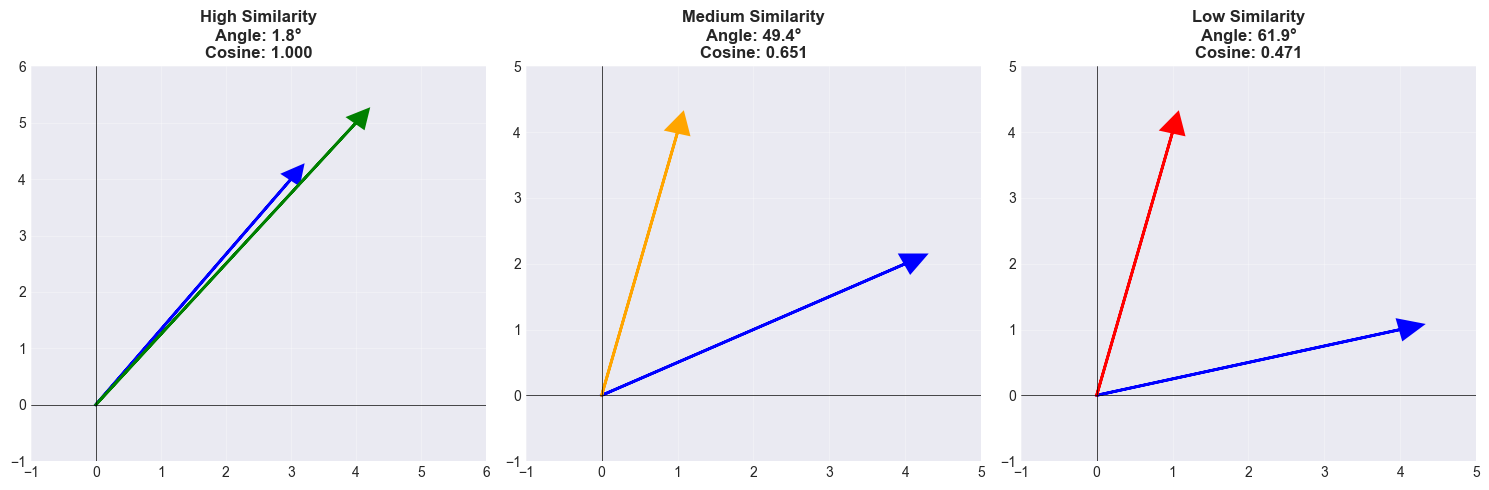

Key Takeaway: Cosine similarity cares about DIRECTION, not length!
Vectors pointing the same way = similar meaning


In [5]:
def cosine_similarity(vec1, vec2):
    """Calculate cosine similarity."""
    dot_product = np.dot(vec1, vec2)
    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)
    return dot_product / (norm1 * norm2)

# Visualize cosine similarity
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Example 1: Very similar (small angle)
v1 = np.array([3, 4])
v2 = np.array([4, 5])
cos_sim = cosine_similarity(v1, v2)
angle = np.degrees(np.arccos(cos_sim))

axes[0].arrow(0, 0, v1[0], v1[1], head_width=0.3, head_length=0.3, fc='blue', ec='blue', linewidth=2)
axes[0].arrow(0, 0, v2[0], v2[1], head_width=0.3, head_length=0.3, fc='green', ec='green', linewidth=2)
axes[0].set_xlim(-1, 6)
axes[0].set_ylim(-1, 6)
axes[0].set_title(f'High Similarity\nAngle: {angle:.1f}°\nCosine: {cos_sim:.3f}', fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].axhline(y=0, color='k', linewidth=0.5)
axes[0].axvline(x=0, color='k', linewidth=0.5)

# Example 2: Somewhat similar (medium angle)
v1 = np.array([4, 2])
v2 = np.array([1, 4])
cos_sim = cosine_similarity(v1, v2)
angle = np.degrees(np.arccos(cos_sim))

axes[1].arrow(0, 0, v1[0], v1[1], head_width=0.3, head_length=0.3, fc='blue', ec='blue', linewidth=2)
axes[1].arrow(0, 0, v2[0], v2[1], head_width=0.3, head_length=0.3, fc='orange', ec='orange', linewidth=2)
axes[1].set_xlim(-1, 5)
axes[1].set_ylim(-1, 5)
axes[1].set_title(f'Medium Similarity\nAngle: {angle:.1f}°\nCosine: {cos_sim:.3f}', fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].axhline(y=0, color='k', linewidth=0.5)
axes[1].axvline(x=0, color='k', linewidth=0.5)

# Example 3: Not similar (large angle)
v1 = np.array([4, 1])
v2 = np.array([1, 4])
cos_sim = cosine_similarity(v1, v2)
angle = np.degrees(np.arccos(cos_sim))

axes[2].arrow(0, 0, v1[0], v1[1], head_width=0.3, head_length=0.3, fc='blue', ec='blue', linewidth=2)
axes[2].arrow(0, 0, v2[0], v2[1], head_width=0.3, head_length=0.3, fc='red', ec='red', linewidth=2)
axes[2].set_xlim(-1, 5)
axes[2].set_ylim(-1, 5)
axes[2].set_title(f'Low Similarity\nAngle: {angle:.1f}°\nCosine: {cos_sim:.3f}', fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].axhline(y=0, color='k', linewidth=0.5)
axes[2].axvline(x=0, color='k', linewidth=0.5)

plt.tight_layout()
plt.show()

print("Key Takeaway: Cosine similarity cares about DIRECTION, not length!")
print("Vectors pointing the same way = similar meaning")

Query: 'What is Python used for?'

Cosine Similarity Scores:

0.8265 - Python is a high-level programming language known for simplicity
0.7036 - Machine learning algorithms learn patterns from data
0.7145 - Deep learning uses neural networks with multiple layers
0.6961 - Natural language processing helps computers understand text
0.8039 - Python has powerful libraries for data science and ML
0.6883 - Neural networks are inspired by the human brain
0.7026 - Data science involves statistics and programming
0.6768 - Artificial intelligence includes machine learning and deep learning


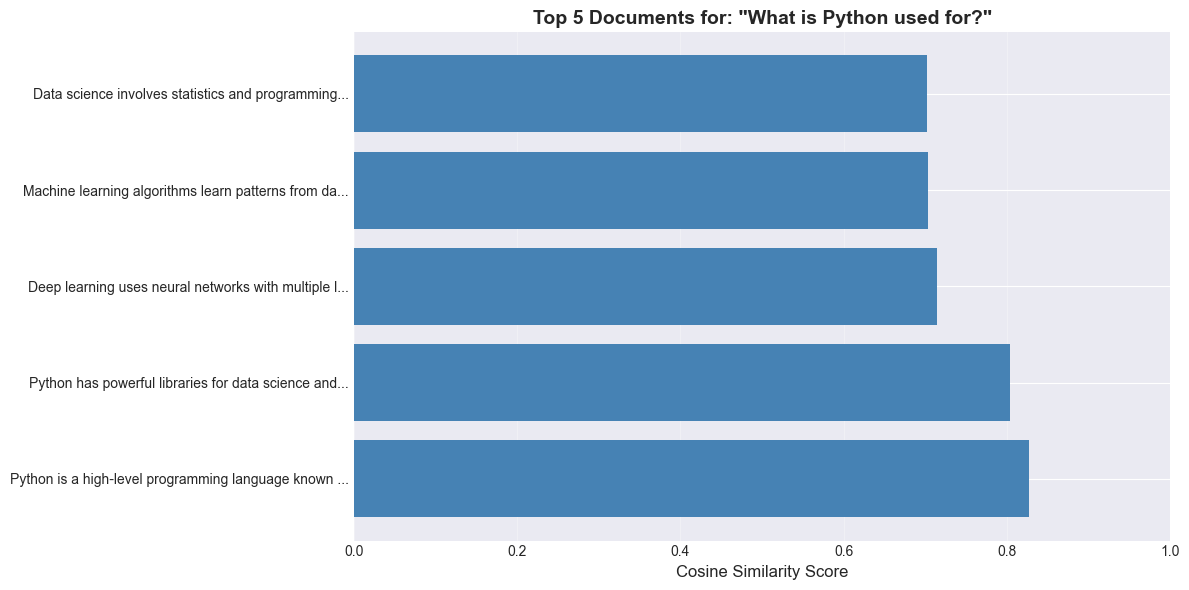

In [6]:
# Apply to real embeddings
query = "What is Python used for?"
query_response = client.embeddings.create(model="mistral-embed", inputs=[query])
query_embedding = np.array(query_response.data[0].embedding)

print(f"Query: '{query}'\n")
print("Cosine Similarity Scores:\n")

scores = []
for i, doc in enumerate(documents):
    score = cosine_similarity(query_embedding, doc_embeddings[i])
    scores.append((score, doc))
    print(f"{score:.4f} - {doc}")

# Visualize as bar chart
scores.sort(reverse=True)
top_scores = scores[:5]

plt.figure(figsize=(12, 6))
plt.barh(range(len(top_scores)), [s[0] for s in top_scores], color='steelblue')
plt.yticks(range(len(top_scores)), [s[1][:50] + '...' for s in top_scores])
plt.xlabel('Cosine Similarity Score', fontsize=12)
plt.title(f'Top 5 Documents for: "{query}"', fontsize=14, fontweight='bold')
plt.xlim(0, 1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### 1.2 Euclidean Distance 📏

**What it measures:** Straight-line distance between two points

**Key insight:** Considers both direction AND magnitude

**Range:** 0 to infinity
- 0 = Identical
- Small = Similar
- Large = Different

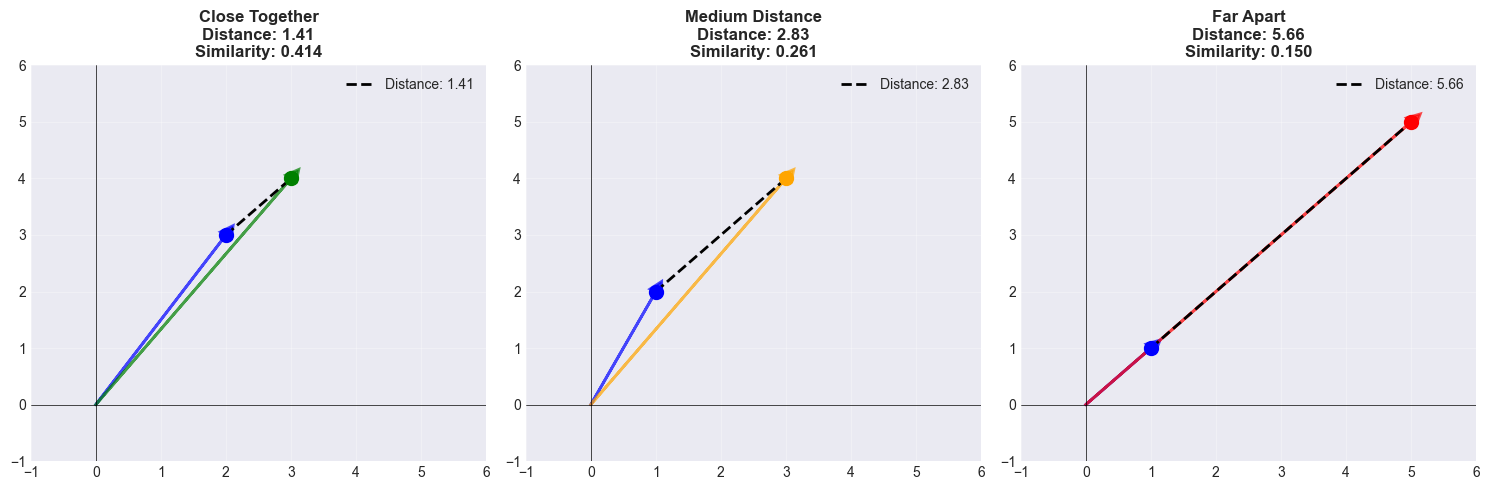

Key Takeaway: Euclidean distance measures the straight-line distance between points!
Closer points = more similar


In [7]:
def euclidean_distance(vec1, vec2):
    """Calculate Euclidean distance."""
    return np.linalg.norm(vec1 - vec2)

def euclidean_similarity(vec1, vec2):
    """Convert distance to similarity (0-1 scale)."""
    dist = euclidean_distance(vec1, vec2)
    return 1 / (1 + dist)

# Visualize Euclidean distance
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

examples = [
    (np.array([2, 3]), np.array([3, 4]), 'Close Together', 'green'),
    (np.array([1, 2]), np.array([3, 4]), 'Medium Distance', 'orange'),
    (np.array([1, 1]), np.array([5, 5]), 'Far Apart', 'red')
]

for idx, (v1, v2, title, color) in enumerate(examples):
    dist = euclidean_distance(v1, v2)
    sim = euclidean_similarity(v1, v2)
    
    # Plot vectors
    axes[idx].arrow(0, 0, v1[0], v1[1], head_width=0.2, head_length=0.2, 
                    fc='blue', ec='blue', linewidth=2, alpha=0.7)
    axes[idx].arrow(0, 0, v2[0], v2[1], head_width=0.2, head_length=0.2, 
                    fc=color, ec=color, linewidth=2, alpha=0.7)
    
    # Draw distance line
    axes[idx].plot([v1[0], v2[0]], [v1[1], v2[1]], 'k--', linewidth=2, label=f'Distance: {dist:.2f}')
    
    # Mark the points
    axes[idx].plot(v1[0], v1[1], 'bo', markersize=10)
    axes[idx].plot(v2[0], v2[1], 'o', color=color, markersize=10)
    
    axes[idx].set_xlim(-1, 6)
    axes[idx].set_ylim(-1, 6)
    axes[idx].set_title(f'{title}\nDistance: {dist:.2f}\nSimilarity: {sim:.3f}', fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].axhline(y=0, color='k', linewidth=0.5)
    axes[idx].axvline(x=0, color='k', linewidth=0.5)
    axes[idx].legend()

plt.tight_layout()
plt.show()

print("Key Takeaway: Euclidean distance measures the straight-line distance between points!")
print("Closer points = more similar")

Query: 'What is Python used for?'

Euclidean Distance Results:

Distance: 0.59, Similarity: 0.6293 - Python is a high-level programming language known for simplicity
Distance: 0.77, Similarity: 0.5650 - Machine learning algorithms learn patterns from data
Distance: 0.76, Similarity: 0.5696 - Deep learning uses neural networks with multiple layers
Distance: 0.78, Similarity: 0.5619 - Natural language processing helps computers understand text
Distance: 0.63, Similarity: 0.6149 - Python has powerful libraries for data science and ML
Distance: 0.79, Similarity: 0.5588 - Neural networks are inspired by the human brain
Distance: 0.77, Similarity: 0.5646 - Data science involves statistics and programming
Distance: 0.80, Similarity: 0.5543 - Artificial intelligence includes machine learning and deep learning


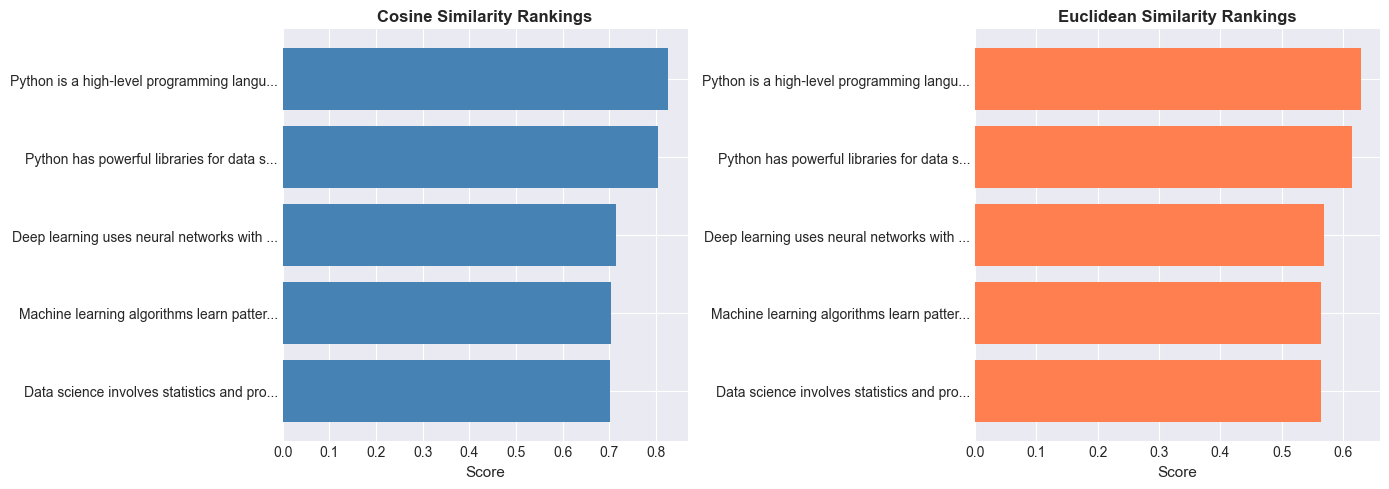

In [8]:
# Apply to real embeddings
print(f"Query: '{query}'\n")
print("Euclidean Distance Results:\n")

euc_scores = []
for i, doc in enumerate(documents):
    dist = euclidean_distance(query_embedding, doc_embeddings[i])
    sim = euclidean_similarity(query_embedding, doc_embeddings[i])
    euc_scores.append((sim, doc, dist))
    print(f"Distance: {dist:.2f}, Similarity: {sim:.4f} - {doc}")

# Compare with cosine similarity
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Cosine similarity
cos_scores = sorted(scores, reverse=True)[:5]
axes[0].barh(range(len(cos_scores)), [s[0] for s in cos_scores], color='steelblue')
axes[0].set_yticks(range(len(cos_scores)))
axes[0].set_yticklabels([s[1][:40] + '...' for s in cos_scores])
axes[0].set_xlabel('Score', fontsize=11)
axes[0].set_title('Cosine Similarity Rankings', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()

# Euclidean similarity
euc_scores_sorted = sorted(euc_scores, reverse=True)[:5]
axes[1].barh(range(len(euc_scores_sorted)), [s[0] for s in euc_scores_sorted], color='coral')
axes[1].set_yticks(range(len(euc_scores_sorted)))
axes[1].set_yticklabels([s[1][:40] + '...' for s in euc_scores_sorted])
axes[1].set_xlabel('Score', fontsize=11)
axes[1].set_title('Euclidean Similarity Rankings', fontsize=12, fontweight='bold')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

### 1.3 Manhattan Distance 🏙️

**What it measures:** Distance along axes (like walking city blocks)

**Key insight:** Sum of absolute differences in each dimension

**Think of it:** Walking in a city grid - you can't go diagonally through buildings!

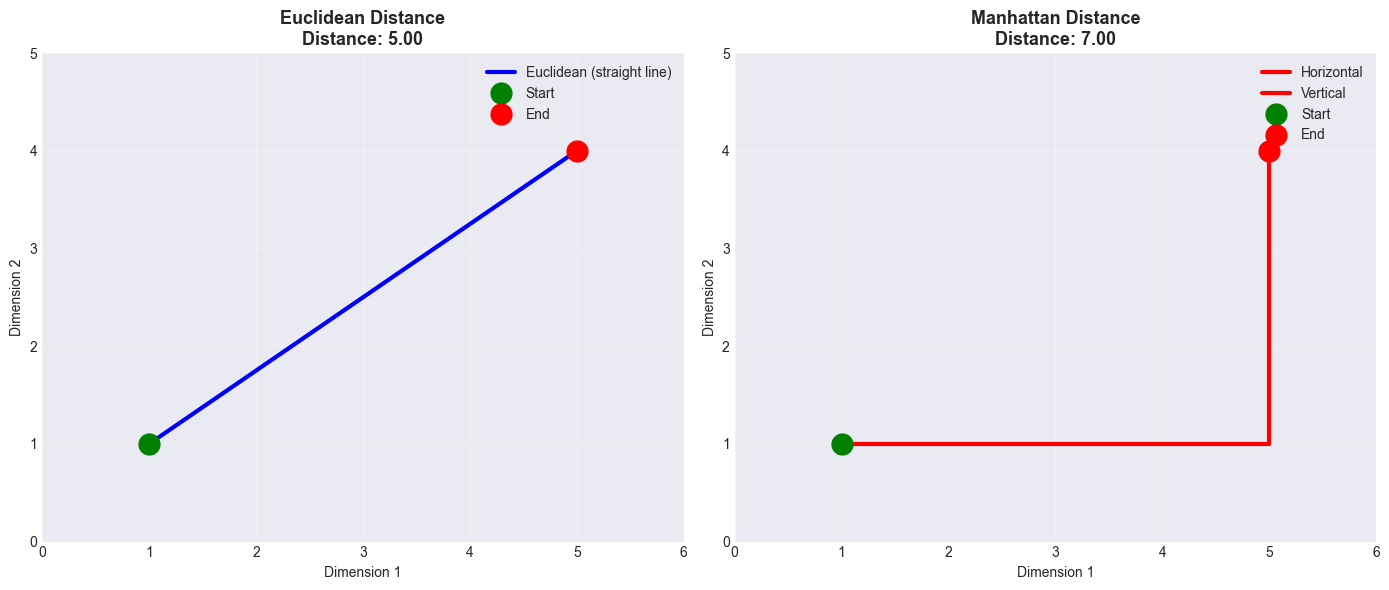

Manhattan distance = |Δx| + |Δy|
In this example: |4| + |3| = 7


In [9]:
def manhattan_distance(vec1, vec2):
    """Calculate Manhattan distance."""
    return np.sum(np.abs(vec1 - vec2))

# Visualize Manhattan vs Euclidean
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

v1 = np.array([1, 1])
v2 = np.array([5, 4])

# Euclidean distance (straight line)
axes[0].plot([v1[0], v2[0]], [v1[1], v2[1]], 'b-', linewidth=3, label='Euclidean (straight line)')
axes[0].plot(v1[0], v1[1], 'go', markersize=15, label='Start')
axes[0].plot(v2[0], v2[1], 'ro', markersize=15, label='End')
axes[0].set_xlim(0, 6)
axes[0].set_ylim(0, 5)
axes[0].grid(True, alpha=0.3)
axes[0].set_title(f'Euclidean Distance\nDistance: {euclidean_distance(v1, v2):.2f}', 
                  fontsize=13, fontweight='bold')
axes[0].set_xlabel('Dimension 1')
axes[0].set_ylabel('Dimension 2')
axes[0].legend()

# Manhattan distance (grid path)
axes[1].plot([v1[0], v2[0]], [v1[1], v1[1]], 'r-', linewidth=3, label='Horizontal')
axes[1].plot([v2[0], v2[0]], [v1[1], v2[1]], 'r-', linewidth=3, label='Vertical')
axes[1].plot(v1[0], v1[1], 'go', markersize=15, label='Start')
axes[1].plot(v2[0], v2[1], 'ro', markersize=15, label='End')
axes[1].set_xlim(0, 6)
axes[1].set_ylim(0, 5)
axes[1].grid(True, alpha=0.3)
axes[1].set_title(f'Manhattan Distance\nDistance: {manhattan_distance(v1, v2):.2f}', 
                  fontsize=13, fontweight='bold')
axes[1].set_xlabel('Dimension 1')
axes[1].set_ylabel('Dimension 2')
axes[1].legend()

plt.tight_layout()
plt.show()

print("Manhattan distance = |Δx| + |Δy|")
print(f"In this example: |{v2[0]-v1[0]}| + |{v2[1]-v1[1]}| = {manhattan_distance(v1, v2):.0f}")

### 1.4 Dot Product Similarity ⚡

**What it measures:** Simple multiplication of vectors

**Key insight:** Fast to compute, considers both angle and magnitude

**Note:** Not normalized like cosine similarity

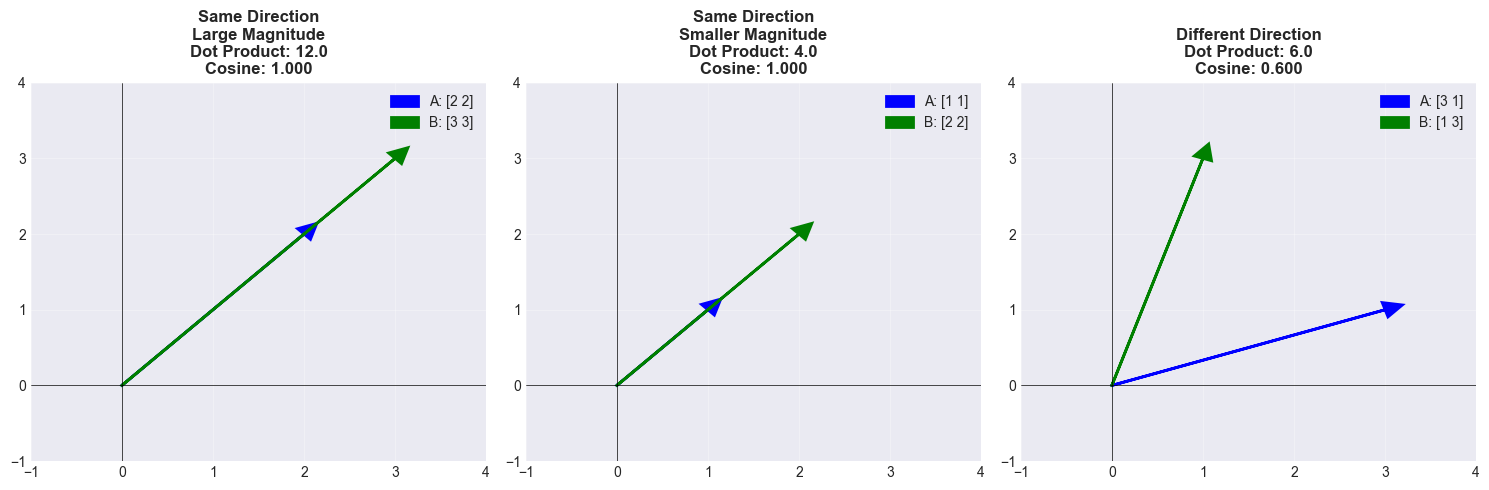

Key Difference: Dot product is affected by vector length!
Longer vectors → higher dot product (even with same direction)


In [10]:
def dot_product_similarity(vec1, vec2):
    """Calculate dot product."""
    return np.dot(vec1, vec2)

# Visualize how dot product works
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

examples = [
    (np.array([2, 2]), np.array([3, 3]), 'Same Direction\nLarge Magnitude'),
    (np.array([1, 1]), np.array([2, 2]), 'Same Direction\nSmaller Magnitude'),
    (np.array([3, 1]), np.array([1, 3]), 'Different Direction')
]

for idx, (v1, v2, title) in enumerate(examples):
    dot_prod = dot_product_similarity(v1, v2)
    cos_sim = cosine_similarity(v1, v2)
    
    axes[idx].arrow(0, 0, v1[0], v1[1], head_width=0.2, head_length=0.2, 
                    fc='blue', ec='blue', linewidth=2, label=f'A: {v1}')
    axes[idx].arrow(0, 0, v2[0], v2[1], head_width=0.2, head_length=0.2, 
                    fc='green', ec='green', linewidth=2, label=f'B: {v2}')
    
    axes[idx].set_xlim(-1, 4)
    axes[idx].set_ylim(-1, 4)
    axes[idx].set_title(f'{title}\nDot Product: {dot_prod:.1f}\nCosine: {cos_sim:.3f}', 
                        fontweight='bold')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].axhline(y=0, color='k', linewidth=0.5)
    axes[idx].axvline(x=0, color='k', linewidth=0.5)
    axes[idx].legend()

plt.tight_layout()
plt.show()

print("Key Difference: Dot product is affected by vector length!")
print("Longer vectors → higher dot product (even with same direction)")

### 1.5 Similarity Heatmap - Compare All Documents

Let's visualize how all documents relate to each other!

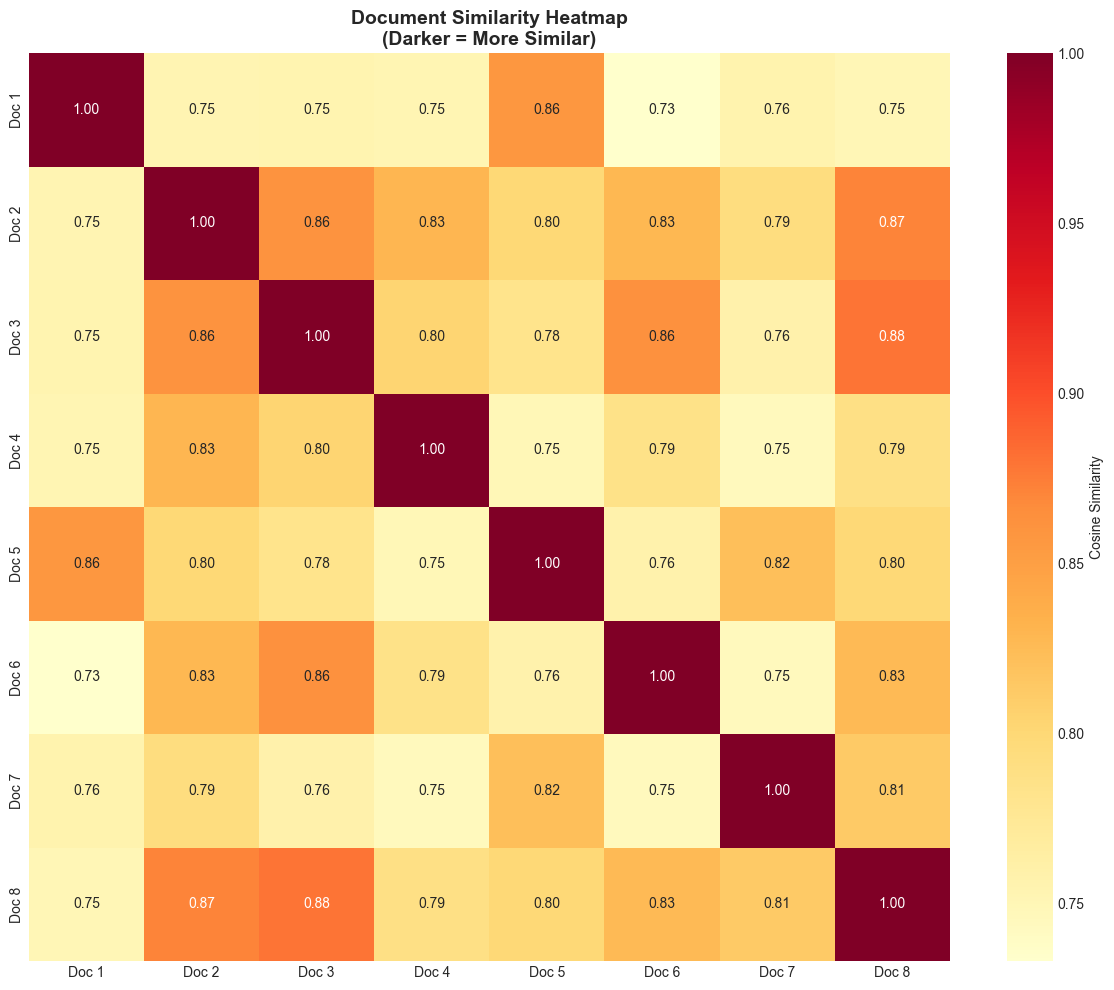


Document Labels:
Doc 1: Python is a high-level programming language known for simpli...
Doc 2: Machine learning algorithms learn patterns from data...
Doc 3: Deep learning uses neural networks with multiple layers...
Doc 4: Natural language processing helps computers understand text...
Doc 5: Python has powerful libraries for data science and ML...
Doc 6: Neural networks are inspired by the human brain...
Doc 7: Data science involves statistics and programming...
Doc 8: Artificial intelligence includes machine learning and deep l...


In [11]:
# Calculate similarity matrix for all documents
n_docs = len(documents)
similarity_matrix = np.zeros((n_docs, n_docs))

for i in range(n_docs):
    for j in range(n_docs):
        similarity_matrix[i, j] = cosine_similarity(doc_embeddings[i], doc_embeddings[j])

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(similarity_matrix, annot=True, fmt='.2f', cmap='YlOrRd', 
            xticklabels=[f"Doc {i+1}" for i in range(n_docs)],
            yticklabels=[f"Doc {i+1}" for i in range(n_docs)],
            cbar_kws={'label': 'Cosine Similarity'})
plt.title('Document Similarity Heatmap\n(Darker = More Similar)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nDocument Labels:")
for i, doc in enumerate(documents):
    print(f"Doc {i+1}: {doc[:60]}...")

### 1.6 Dimensionality Reduction Visualization

Let's reduce our high-dimensional embeddings to 2D to see document relationships!

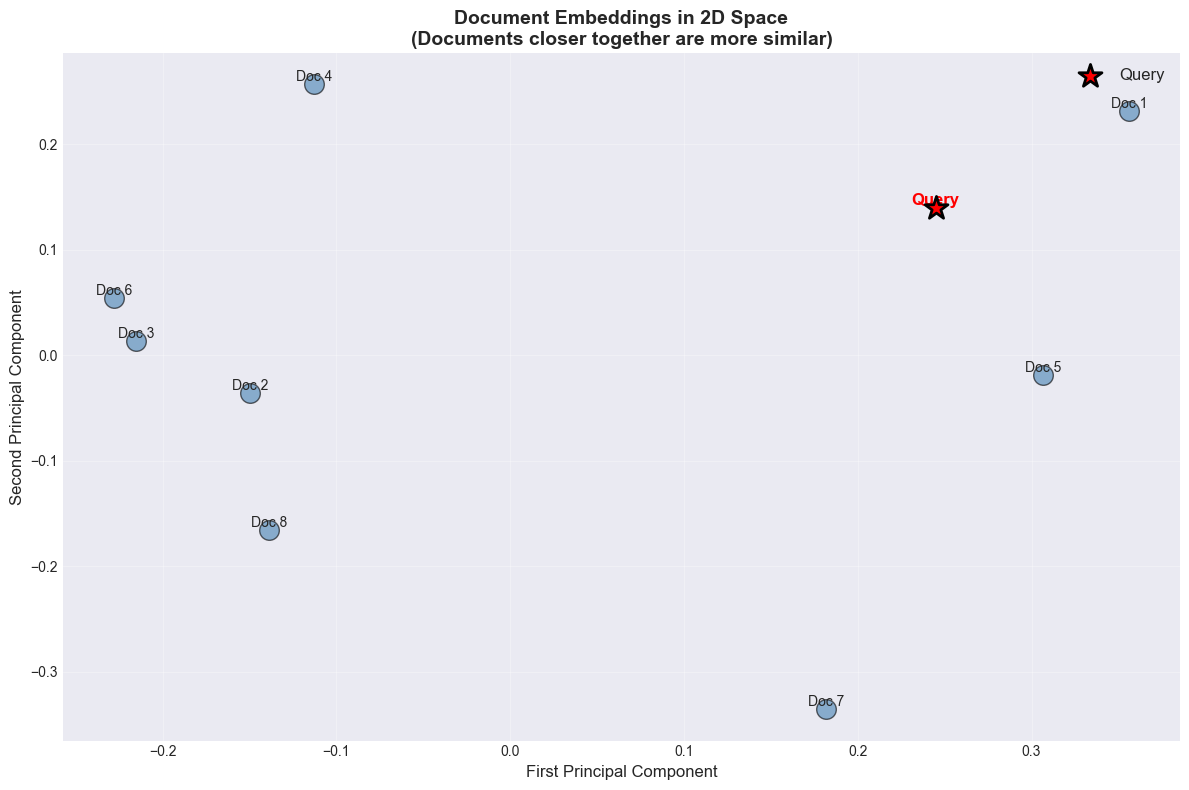

Documents positioned closer to the query are more relevant!


In [12]:
from sklearn.decomposition import PCA

# Reduce embeddings to 2D
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(doc_embeddings)

# Also transform the query
query_2d = pca.transform([query_embedding])[0]

# Plot
plt.figure(figsize=(12, 8))
plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], s=200, c='steelblue', alpha=0.6, edgecolors='black')
plt.scatter(query_2d[0], query_2d[1], s=300, c='red', marker='*', edgecolors='black', 
            linewidths=2, label='Query', zorder=5)

# Add labels
for i, doc in enumerate(documents):
    plt.annotate(f'Doc {i+1}', (embeddings_2d[i, 0], embeddings_2d[i, 1]), 
                fontsize=10, ha='center', va='bottom')

plt.annotate('Query', (query_2d[0], query_2d[1]), fontsize=12, ha='center', 
            va='bottom', fontweight='bold', color='red')

plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('Document Embeddings in 2D Space\n(Documents closer together are more similar)', 
         fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Documents positioned closer to the query are more relevant!")

## Part 2: Ranking Strategies with Visualizations

### 2.1 Simple Similarity Ranking

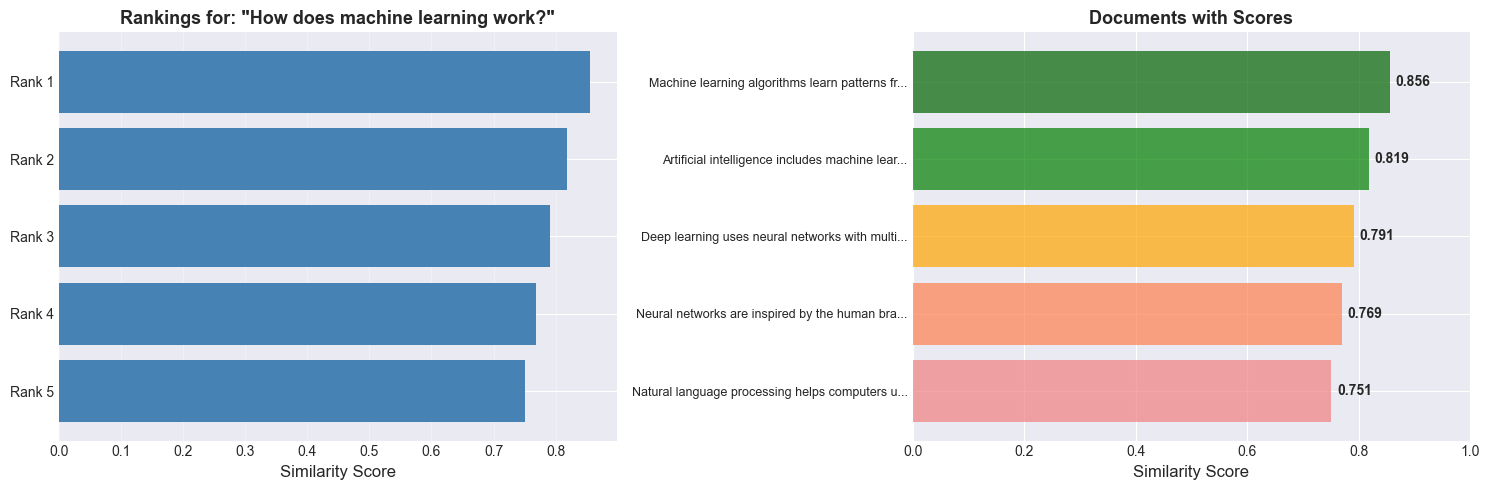


Top 5 Results:
1. [0.8557] Machine learning algorithms learn patterns from data
2. [0.8188] Artificial intelligence includes machine learning and deep learning
3. [0.7908] Deep learning uses neural networks with multiple layers
4. [0.7692] Neural networks are inspired by the human brain
5. [0.7510] Natural language processing helps computers understand text


In [13]:
def simple_ranking(query_embedding, doc_embeddings, documents, top_k=5):
    """Simple ranking by cosine similarity."""
    scores = [cosine_similarity(query_embedding, emb) for emb in doc_embeddings]
    indexed_scores = list(enumerate(scores))
    indexed_scores.sort(key=lambda x: x[1], reverse=True)
    
    results = []
    for idx, score in indexed_scores[:top_k]:
        results.append({
            'document': documents[idx],
            'score': score,
            'rank': len(results) + 1,
            'index': idx
        })
    return results

query = "How does machine learning work?"
query_response = client.embeddings.create(model="mistral-embed", inputs=[query])
query_embedding = np.array(query_response.data[0].embedding)

results = simple_ranking(query_embedding, doc_embeddings, documents, top_k=5)

# Visualize results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Bar chart
ax1.barh(range(len(results)), [r['score'] for r in results], color='steelblue')
ax1.set_yticks(range(len(results)))
ax1.set_yticklabels([f"Rank {r['rank']}" for r in results])
ax1.set_xlabel('Similarity Score', fontsize=12)
ax1.set_title(f'Rankings for: "{query}"', fontsize=13, fontweight='bold')
ax1.invert_yaxis()
ax1.grid(axis='x', alpha=0.3)

# Color-coded scores
colors = ['darkgreen', 'green', 'orange', 'coral', 'lightcoral']
for i, result in enumerate(results):
    ax2.barh(i, result['score'], color=colors[i], alpha=0.7)
    ax2.text(result['score'] + 0.01, i, f"{result['score']:.3f}", 
            va='center', fontweight='bold')

ax2.set_yticks(range(len(results)))
ax2.set_yticklabels([r['document'][:45] + '...' for r in results], fontsize=9)
ax2.set_xlabel('Similarity Score', fontsize=12)
ax2.set_title('Documents with Scores', fontsize=13, fontweight='bold')
ax2.invert_yaxis()
ax2.set_xlim(0, 1)

plt.tight_layout()
plt.show()

print("\nTop 5 Results:")
for result in results:
    print(f"{result['rank']}. [{result['score']:.4f}] {result['document']}")

### 2.2 Hybrid Search (Semantic + Keyword) Visualization

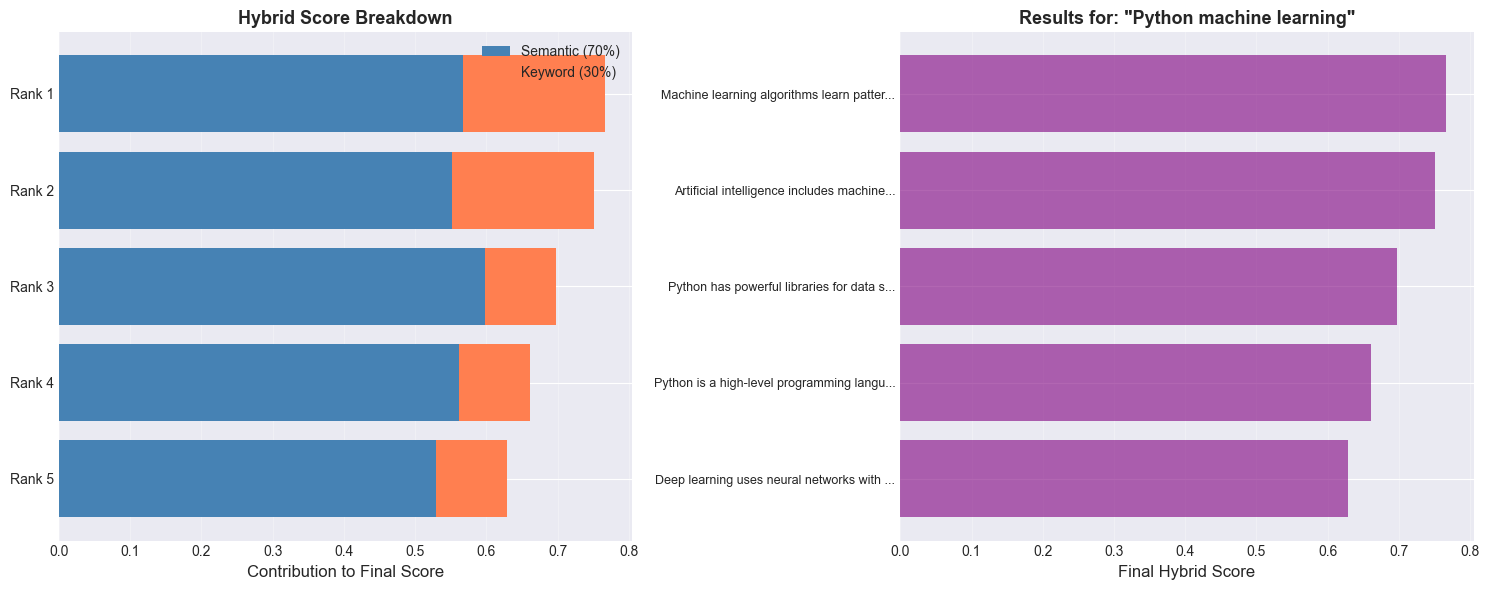


Hybrid Search Results:
1. [Hybrid: 0.7666] (Sem: 0.809, Key: 0.667)
    Machine learning algorithms learn patterns from data

2. [Hybrid: 0.7514] (Sem: 0.788, Key: 0.667)
    Artificial intelligence includes machine learning and deep learning

3. [Hybrid: 0.6977] (Sem: 0.854, Key: 0.333)
    Python has powerful libraries for data science and ML

4. [Hybrid: 0.6610] (Sem: 0.801, Key: 0.333)
    Python is a high-level programming language known for simplicity

5. [Hybrid: 0.6288] (Sem: 0.755, Key: 0.333)
    Deep learning uses neural networks with multiple layers



In [14]:
def keyword_score(query, document):
    """Simple keyword matching score."""
    query_words = set(query.lower().split())
    doc_words = set(document.lower().split())
    if not query_words:
        return 0.0
    matches = query_words.intersection(doc_words)
    return len(matches) / len(query_words)

def hybrid_search(query, documents, doc_embeddings, semantic_weight=0.7, keyword_weight=0.3, top_k=5):
    """Combine semantic and keyword search."""
    query_response = client.embeddings.create(model="mistral-embed", inputs=[query])
    query_embedding = np.array(query_response.data[0].embedding)
    
    semantic_scores = [cosine_similarity(query_embedding, emb) for emb in doc_embeddings]
    keyword_scores = [keyword_score(query, doc) for doc in documents]
    
    hybrid_scores = []
    for i in range(len(documents)):
        combined = semantic_weight * semantic_scores[i] + keyword_weight * keyword_scores[i]
        hybrid_scores.append(combined)
    
    indexed_scores = list(enumerate(hybrid_scores))
    indexed_scores.sort(key=lambda x: x[1], reverse=True)
    
    results = []
    for idx, score in indexed_scores[:top_k]:
        results.append({
            'document': documents[idx],
            'hybrid_score': score,
            'semantic_score': semantic_scores[idx],
            'keyword_score': keyword_scores[idx],
            'rank': len(results) + 1
        })
    return results

query = "Python machine learning"
results = hybrid_search(query, documents, doc_embeddings, 0.7, 0.3, top_k=5)

# Visualize component scores
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Stacked bar chart showing components
ranks = [r['rank'] for r in results]
semantic_contrib = [r['semantic_score'] * 0.7 for r in results]
keyword_contrib = [r['keyword_score'] * 0.3 for r in results]

axes[0].barh(ranks, semantic_contrib, label='Semantic (70%)', color='steelblue')
axes[0].barh(ranks, keyword_contrib, left=semantic_contrib, label='Keyword (30%)', color='coral')
axes[0].set_yticks(ranks)
axes[0].set_yticklabels([f"Rank {r}" for r in ranks])
axes[0].set_xlabel('Contribution to Final Score', fontsize=12)
axes[0].set_title('Hybrid Score Breakdown', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Final hybrid scores
axes[1].barh(ranks, [r['hybrid_score'] for r in results], color='purple', alpha=0.6)
axes[1].set_yticks(ranks)
axes[1].set_yticklabels([r['document'][:40] + '...' for r in results], fontsize=9)
axes[1].set_xlabel('Final Hybrid Score', fontsize=12)
axes[1].set_title(f'Results for: "{query}"', fontsize=13, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nHybrid Search Results:")
for r in results:
    print(f"{r['rank']}. [Hybrid: {r['hybrid_score']:.4f}] (Sem: {r['semantic_score']:.3f}, Key: {r['keyword_score']:.3f})")
    print(f"    {r['document']}\n")

### 2.3 Comparing Different Weight Combinations

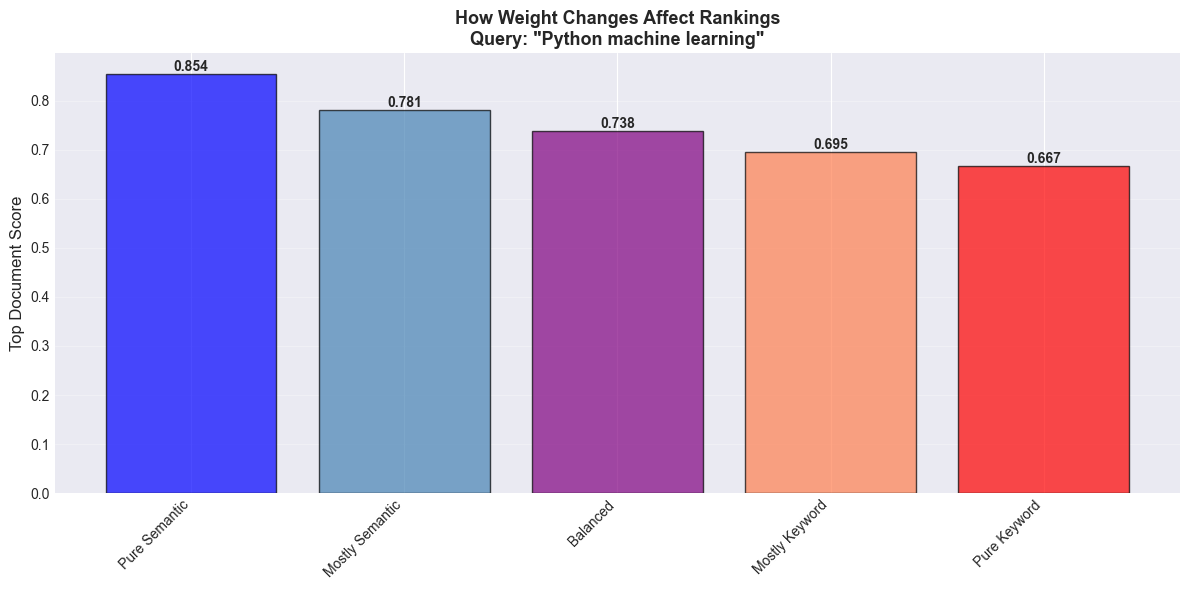


Top result for each weight configuration:
Pure Semantic        [0.8538] Python has powerful libraries for data science and...
Mostly Semantic      [0.7809] Machine learning algorithms learn patterns from da...
Balanced             [0.7380] Machine learning algorithms learn patterns from da...
Mostly Keyword       [0.6952] Machine learning algorithms learn patterns from da...
Pure Keyword         [0.6667] Machine learning algorithms learn patterns from da...


In [15]:
# Test different weight combinations
weight_configs = [
    (1.0, 0.0, "Pure Semantic"),
    (0.8, 0.2, "Mostly Semantic"),
    (0.5, 0.5, "Balanced"),
    (0.2, 0.8, "Mostly Keyword"),
    (0.0, 1.0, "Pure Keyword")
]

# Collect top result for each configuration
top_results = []
for sem_weight, key_weight, label in weight_configs:
    results = hybrid_search(query, documents, doc_embeddings, sem_weight, key_weight, top_k=1)
    top_results.append((label, results[0]['document'][:50], results[0]['hybrid_score']))

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))

labels = [r[0] for r in top_results]
scores = [r[2] for r in top_results]
colors = ['blue', 'steelblue', 'purple', 'coral', 'red']

bars = ax.bar(range(len(labels)), scores, color=colors, alpha=0.7, edgecolor='black')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel('Top Document Score', fontsize=12)
ax.set_title(f'How Weight Changes Affect Rankings\nQuery: "{query}"', 
            fontsize=13, fontweight='bold')
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, score in zip(bars, scores):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print("\nTop result for each weight configuration:")
for label, doc, score in top_results:
    print(f"{label:20s} [{score:.4f}] {doc}...")

### 2.4 Maximal Marginal Relevance (MMR) Visualization

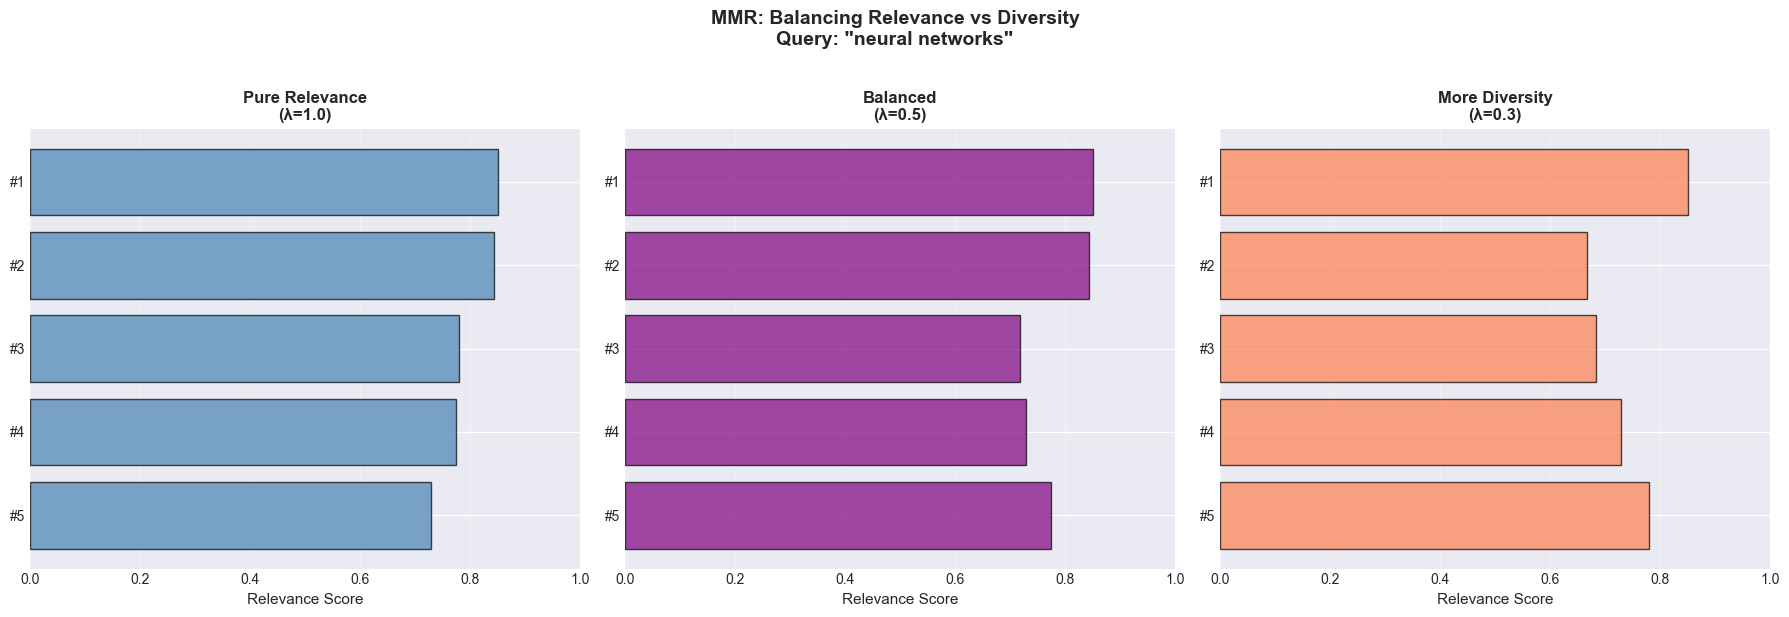


Comparison of Strategies:

Pure Relevance (most similar documents):
  1. Neural networks are inspired by the human brain...
  2. Deep learning uses neural networks with multiple layers...
  3. Artificial intelligence includes machine learning and deep l...
  4. Machine learning algorithms learn patterns from data...
  5. Natural language processing helps computers understand text...

MMR Balanced (relevance + diversity):
  1. Neural networks are inspired by the human brain...
  2. Deep learning uses neural networks with multiple layers...
  3. Python has powerful libraries for data science and ML...
  4. Natural language processing helps computers understand text...
  5. Machine learning algorithms learn patterns from data...


In [16]:
def maximal_marginal_relevance(query_embedding, doc_embeddings, documents, lambda_param=0.5, top_k=5):
    """MMR: Balance relevance and diversity."""
    relevance_scores = [cosine_similarity(query_embedding, emb) for emb in doc_embeddings]
    
    selected_indices = []
    remaining_indices = list(range(len(documents)))
    
    for _ in range(min(top_k, len(documents))):
        mmr_scores = []
        
        for idx in remaining_indices:
            relevance = relevance_scores[idx]
            
            if selected_indices:
                max_similarity = max([
                    cosine_similarity(doc_embeddings[idx], doc_embeddings[sel_idx])
                    for sel_idx in selected_indices
                ])
            else:
                max_similarity = 0
            
            mmr = lambda_param * relevance - (1 - lambda_param) * max_similarity
            mmr_scores.append((idx, mmr, relevance, max_similarity))
        
        best_idx, best_mmr, best_rel, best_sim = max(mmr_scores, key=lambda x: x[1])
        selected_indices.append(best_idx)
        remaining_indices.remove(best_idx)
    
    results = []
    for rank, idx in enumerate(selected_indices, 1):
        results.append({
            'document': documents[idx],
            'relevance': relevance_scores[idx],
            'rank': rank,
            'index': idx
        })
    return results

query = "neural networks"
query_response = client.embeddings.create(model="mistral-embed", inputs=[query])
query_embedding = np.array(query_response.data[0].embedding)

# Compare pure relevance vs MMR
pure_relevance = maximal_marginal_relevance(query_embedding, doc_embeddings, documents, lambda_param=1.0, top_k=5)
mmr_balanced = maximal_marginal_relevance(query_embedding, doc_embeddings, documents, lambda_param=0.5, top_k=5)
mmr_diversity = maximal_marginal_relevance(query_embedding, doc_embeddings, documents, lambda_param=0.3, top_k=5)

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

configs = [
    (pure_relevance, "Pure Relevance\n(λ=1.0)", 'steelblue'),
    (mmr_balanced, "Balanced\n(λ=0.5)", 'purple'),
    (mmr_diversity, "More Diversity\n(λ=0.3)", 'coral')
]

for idx, (results, title, color) in enumerate(configs):
    ranks = [r['rank'] for r in results]
    scores = [r['relevance'] for r in results]
    
    axes[idx].barh(ranks, scores, color=color, alpha=0.7, edgecolor='black')
    axes[idx].set_yticks(ranks)
    axes[idx].set_yticklabels([f"#{r}" for r in ranks])
    axes[idx].set_xlabel('Relevance Score', fontsize=11)
    axes[idx].set_title(title, fontsize=12, fontweight='bold')
    axes[idx].invert_yaxis()
    axes[idx].grid(axis='x', alpha=0.3)
    axes[idx].set_xlim(0, 1)

plt.suptitle(f'MMR: Balancing Relevance vs Diversity\nQuery: "{query}"', 
            fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("\nComparison of Strategies:\n")
print("Pure Relevance (most similar documents):")
for r in pure_relevance:
    print(f"  {r['rank']}. {r['document'][:60]}...")

print("\nMMR Balanced (relevance + diversity):")
for r in mmr_balanced:
    print(f"  {r['rank']}. {r['document'][:60]}...")

## Summary: Visual Guide to Choosing Metrics

### Quick Reference Chart

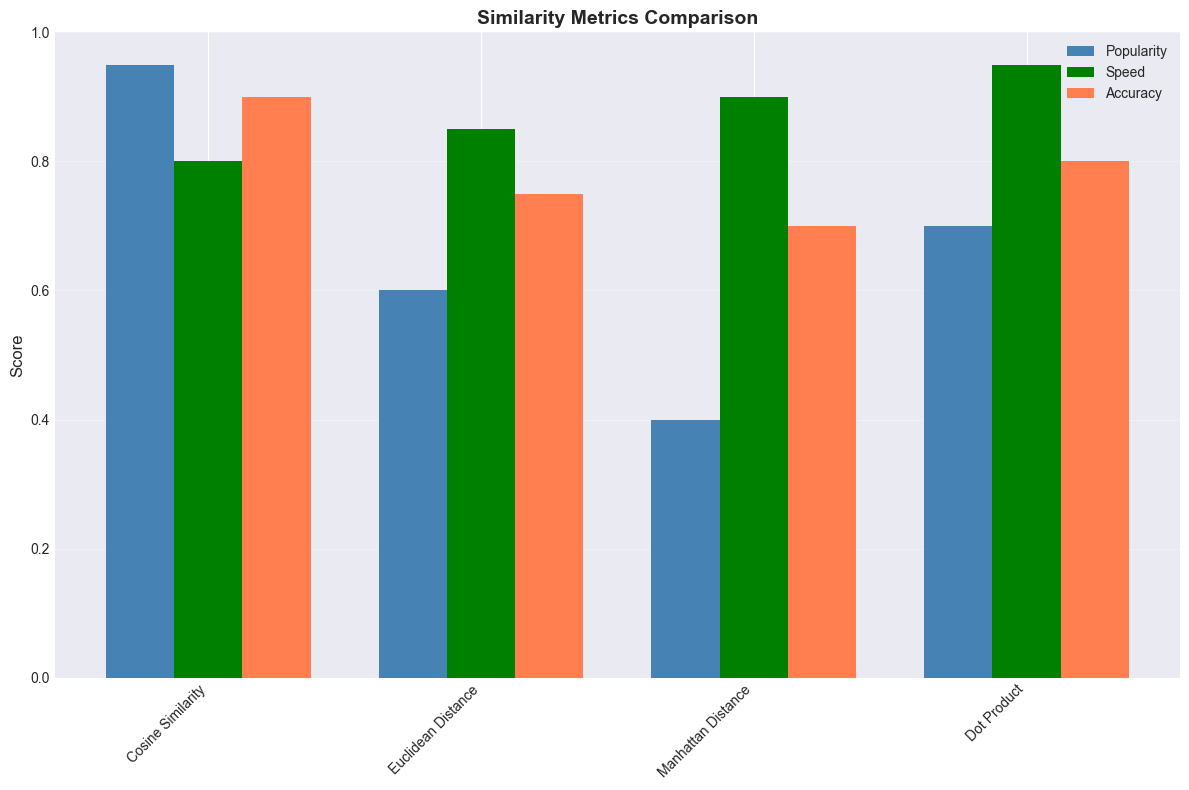


📊 Recommendation Guide:

✅ Use COSINE SIMILARITY when:
   • You care about direction, not magnitude
   • Working with text embeddings (most common)
   • You want industry-standard results

⚡ Use DOT PRODUCT when:
   • Speed is critical
   • You want to consider vector magnitude
   • Building real-time search systems

📏 Use EUCLIDEAN DISTANCE when:
   • Absolute distances matter
   • Working with normalized vectors
   • Combining with other distance-based algorithms

🏙️ Use MANHATTAN DISTANCE when:
   • Working in high-dimensional spaces
   • You want robustness to outliers
   • Interpretability is important


In [17]:
# Create a comparison visualization
fig, ax = plt.subplots(figsize=(12, 8))

metrics_data = {
    'Cosine Similarity': {'popularity': 0.95, 'speed': 0.8, 'accuracy': 0.9},
    'Euclidean Distance': {'popularity': 0.6, 'speed': 0.85, 'accuracy': 0.75},
    'Manhattan Distance': {'popularity': 0.4, 'speed': 0.9, 'accuracy': 0.7},
    'Dot Product': {'popularity': 0.7, 'speed': 0.95, 'accuracy': 0.8},
}

metrics = list(metrics_data.keys())
x = np.arange(len(metrics))
width = 0.25

popularity = [metrics_data[m]['popularity'] for m in metrics]
speed = [metrics_data[m]['speed'] for m in metrics]
accuracy = [metrics_data[m]['accuracy'] for m in metrics]

ax.bar(x - width, popularity, width, label='Popularity', color='steelblue')
ax.bar(x, speed, width, label='Speed', color='green')
ax.bar(x + width, accuracy, width, label='Accuracy', color='coral')

ax.set_ylabel('Score', fontsize=12)
ax.set_title('Similarity Metrics Comparison', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics, rotation=45, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

print("\n📊 Recommendation Guide:")
print("\n✅ Use COSINE SIMILARITY when:")
print("   • You care about direction, not magnitude")
print("   • Working with text embeddings (most common)")
print("   • You want industry-standard results")

print("\n⚡ Use DOT PRODUCT when:")
print("   • Speed is critical")
print("   • You want to consider vector magnitude")
print("   • Building real-time search systems")

print("\n📏 Use EUCLIDEAN DISTANCE when:")
print("   • Absolute distances matter")
print("   • Working with normalized vectors")
print("   • Combining with other distance-based algorithms")

print("\n🏙️ Use MANHATTAN DISTANCE when:")
print("   • Working in high-dimensional spaces")
print("   • You want robustness to outliers")
print("   • Interpretability is important")

## Practice Exercise

Try these visualizations with your own data!

In [18]:
# Add your own documents
my_documents = [
    "Your first document here",
    "Your second document here",
    "Your third document here",
    # Add more...
]

# Get embeddings
# response = client.embeddings.create(model="mistral-embed", inputs=my_documents)
# my_embeddings = [np.array(item.embedding) for item in response.data]

# Your query
# my_query = "Your search query"

# Try the visualizations above with your data!
print("Replace the placeholder text with your documents and run the cells above!")

Replace the placeholder text with your documents and run the cells above!
